In [9]:
from imp import reload

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns

from lib import IO
from lib import Loader
from lib import graph
from lib import pt_utils

plt.rcParams['figure.dpi'] = 100
serif = plt.rcParams['font.sans-serif']
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['font.sans-serif'] = serif

reload(Loader)
reload(graph)
reload(IO)
la = Loader.LALoader()
bjh = Loader.BJLoader('highway')
bjm = Loader.BJLoader('metro')

## station references

In [2]:
pd.std?

Object `pd.std` not found.


In [44]:
flow = bjh.load_ts().sum()
type(flow)

pandas.core.series.Series

In [47]:
for loader in [bjh, bjm]:
    station = loader.load_node()
    flow = loader.load_ts().sum().values
    num_station = len(flow) // 2
    origin = flow[:num_station]
    destination = flow[num_station:]
    origin_idx = np.argsort(origin)[-20:]
    destination_idx = np.argsort(destination)[-20:]
    print('entry', station.iloc[origin_idx])
    print('exit', station.iloc[destination_idx])


entry       name  station  route   latitude   longitude   id
900    百泉庄        4    899  40.196851  116.206825  900
102  西红门南桥        2      3  39.777243  116.337658  102
884    打铁庄        8    876  40.067510  117.000695  884
98      常屯        8      1  39.924792  116.705201   98
70     沙峪站        3      4  40.091947  116.474997   70
519   昌平西关       11      5  40.221295  116.200762  519
879    李桥站        3    876  40.038581  116.680105  879
518   昌平南环       10      5  40.203912  116.220665  518
882    北务站        6    876  40.044515  116.800203  882
880    沿河站        4    876  40.037176  116.702125  880
99    马驹桥站       13      1  39.751374  116.567083   99
907    青龙湖       24      1  39.790423  116.110033  907
878   半壁店站        2    876  40.024066  116.637942  878
129     良乡       20      1  39.698325  116.144576  129
898     黄港        1    864  40.055966  116.476394  898
128     长阳       19      1  39.694889  116.205083  128
863    香河站        7    855  39.795207  117.005445  863
862 

### digitized ods' distributions

D:\Projects\ST_Attention\lib\graph.py:79: RuntimeWarning: invalid value encountered in true_divide
  do_ = od.transpose() / od.sum(1)
D:\Projects\ST_Attention\lib\graph.py:80: RuntimeWarning: invalid value encountered in true_divide
  return od_, do_
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.0145202020202


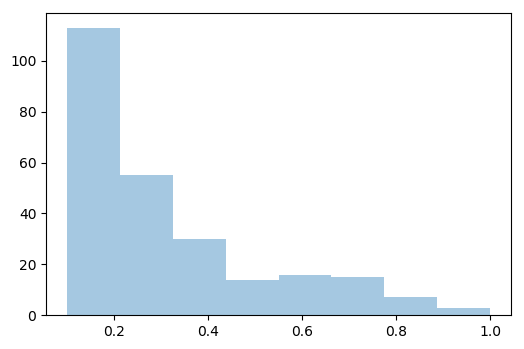

0.000153152149699


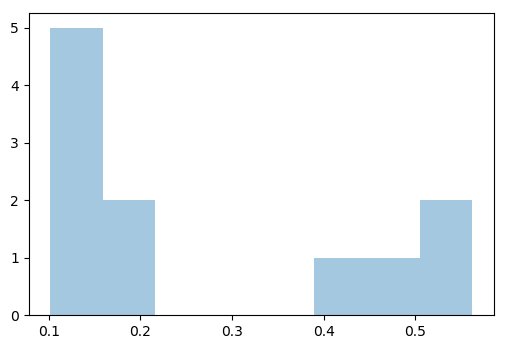

In [54]:
reload(graph)
for loader in [bjh, bjm]:
    od = loader.load_od()
    od, do = graph.calculate_od_adj(od)
    values = od.reshape(-1)
    index = values > 0.1
    print(sum(index) / len(index))
    sns.distplot(values[index], bins=8, kde=False)
    plt.show()

### Time series scaled distributions

In [4]:
np.histogram
plt.hist?

C:\Users\shawnwan47\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


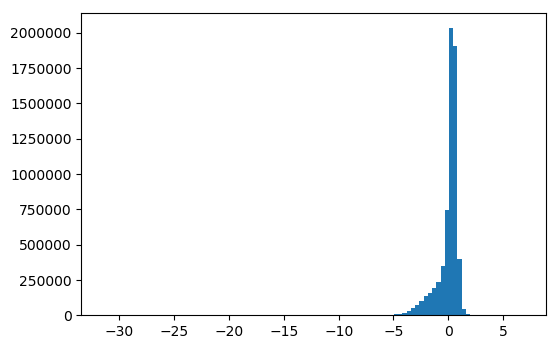

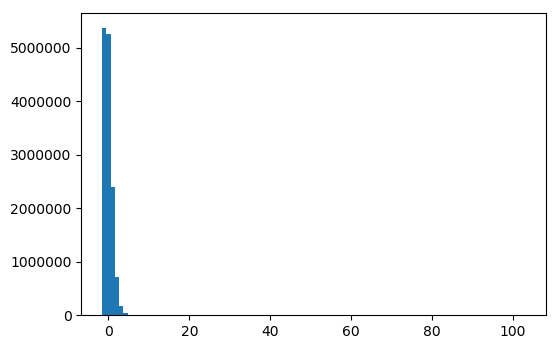

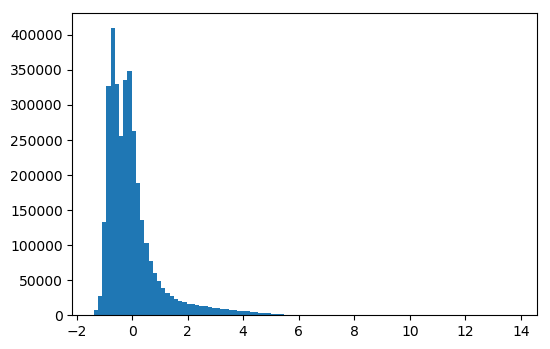

In [5]:
def scale(ts):
    return (ts - ts.mean()) / (ts.std() + 1e-8)

for loader in [la, bjh, bjm]:
    ts = loader.load_ts()
    if loader is la:
        ts[ts == 0] = np.nan
    plt.figure()
    values = scale(ts).values.reshape(-1)
    values = values[~np.isnan(values)]
#     sns.distplot(values, kde=False)
    plt.hist(values, bins=100)
    plt.axis('tight')
    plt.show()

### Time Series Distributions

C:\Users\shawnwan47\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


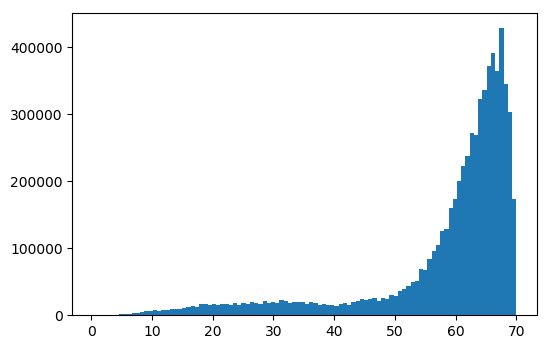

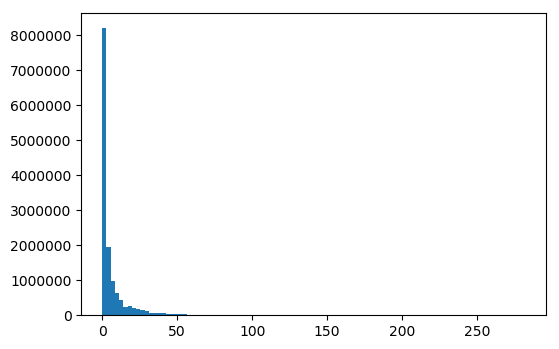

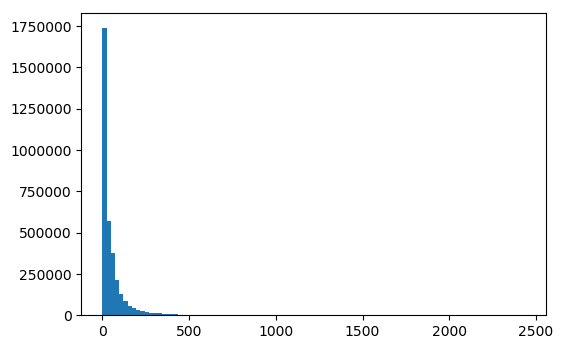

In [6]:
for loader in [la, bjh, bjm]:
    ts = loader.load_ts()
    if loader is la:
        ts[ts == 0] = np.nan
    plt.figure()
    values = ts.values.reshape(-1)
    values = values[~np.isnan(values)]
    plt.hist(values, 100)
    plt.axis("tight")
    plt.show()

### Time Series Log Distributions

In [6]:
np.log1p([1,2,3,4,5]) / np.log(1.1)

array([  7.2725409 ,  11.52670461,  14.54508179,  16.88631703,  18.7992455 ])

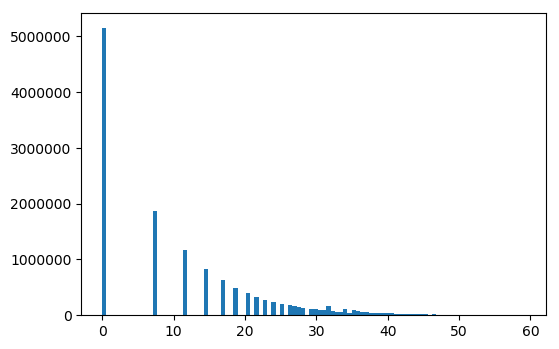

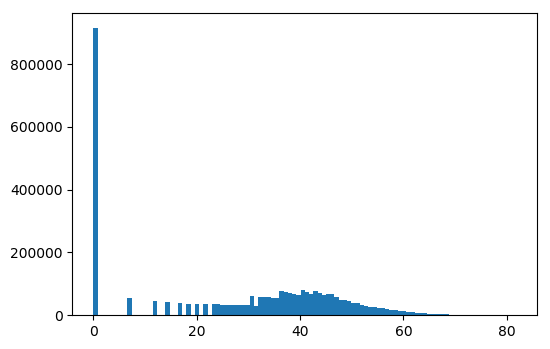

In [10]:
for loader in [bjh, bjm]:
    ts = loader.load_ts()
    if loader is la:
        ts[ts == 0] = np.nan
    plt.figure()
    values = ts.values.reshape(-1)
    values = values[~np.isnan(values)]
    values = np.log1p(values) / np.log(1.1)
    plt.hist(values, 100)
    plt.axis("tight")
    plt.show()

C:\Users\shawnwan47\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


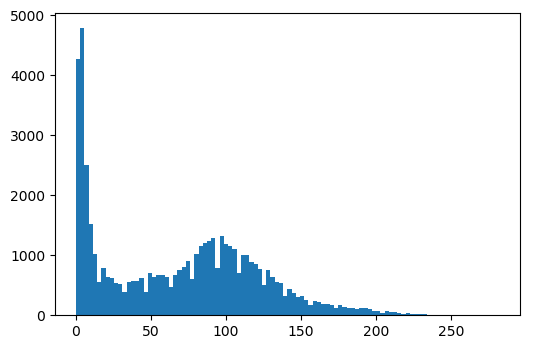

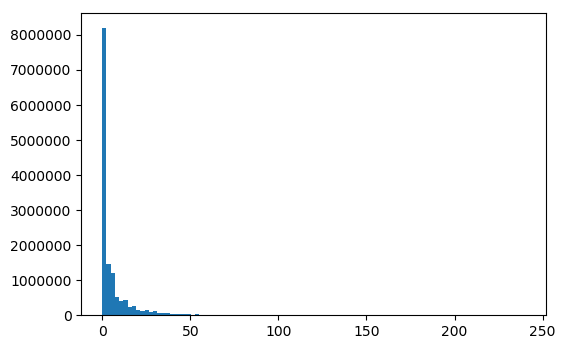

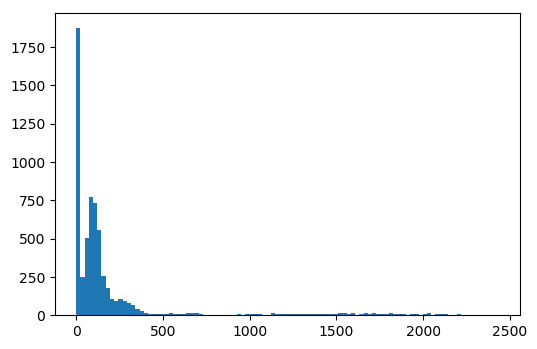

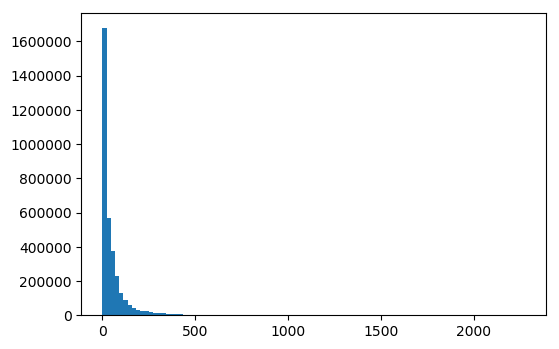

In [21]:
for loader, max_val in zip([bjh, bjm], [100, 1000]):
    ts = loader.load_ts()
    node = loader.load_node()
    if loader is la:
        ts[ts == 0] = np.nan
    idx = np.where(ts.max() > max_val) % (ts.shape[1] // 2)
    values = ts.loc[:, idx].values
    plt.hist(values, 100)
    plt.show()
    values = ts.loc[:, ~idx].values.reshape(-1)
    plt.hist(values, 100)
    plt.show()

### distance and hops distributions

C:\Users\shawnwan47\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


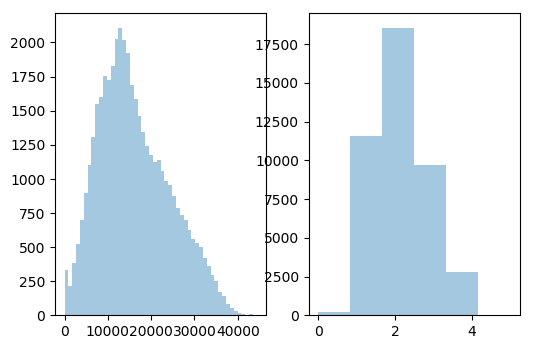

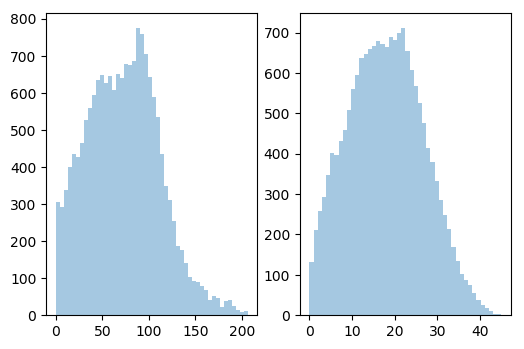

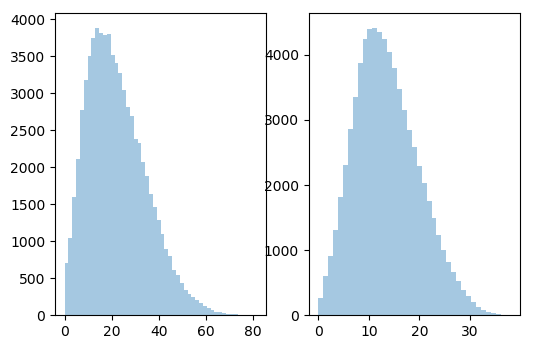

In [9]:
def show_dist_hop(dist, hop):
    plt.figure()
    plt.subplot(121)
    sns.distplot(dist.values.reshape(-1), kde=False)
    plt.subplot(122)
    sns.distplot(hop.values.reshape(-1), kde=False, bins=hop.max().max() + 1)

for loader in [la, bjh, bjm]:
    dist = loader.load_dist()
    hop = loader.load_hop()
    show_dist_hop(dist, hop)
    
plt.show()


### OD Temporal Sparsity

In [9]:

def get_week_index(od):
    datetime = od.index.levels[0]
    return datetime[datetime.weekofyear == (datetime.weekofyear[0] + 2)]

def od_asfreq(od, freq):
    names = od.index.names
    datetime_group = pd.Grouper(level=names[0], freq=freq)
    od_freq = od.groupby([datetime_group, names[1], names[2]]).sum()
    return od_freq


In [106]:
od = bjh.load_ts_od()
od = od_asfreq(od, '15min')
idx = get_week_index(od)
od = od.loc[list(idx)]

C:\Users\shawnwan47\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [107]:
station = bjh.load_node()
for col, val in zip(odsum.columns, odsum.max().values):
    row = odsum.index[odsum[col] == val][0]
    if val > np.mean(odsum.max().values):
        print(row, station.name.loc[row], col, station.name.loc[col], val)

49 赵辛店站 133 六里桥 852665.0
133 六里桥 51 良乡机场 857571.0
133 六里桥 54 琉璃河 194930.0
133 六里桥 53 窦店 162471.0
133 六里桥 52 阎村 351957.0
133 六里桥 50 京良路口 766688.0
133 六里桥 49 赵辛店站 784026.0
133 六里桥 55 琉璃河南 315667.0
102 西红门南桥 56 西红门站 676711.0
56 西红门站 942 榆垡南 233316.0
56 西红门站 59 金华寺 487478.0
56 西红门站 57 高米店 331822.0
68 京承主站 920 宽沟 148270.0
68 京承主站 921 怀山柔水 303104.0
68 京承主站 923 密云 248234.0
68 京承主站 917 高丽营 229678.0
68 京承主站 103 黄港站 768267.0
68 京承主站 70 沙峪站 906153.0
103 黄港站 68 京承主站 850819.0
512 上清站 480 小汤山站 376952.0
480 小汤山站 512 上清站 301967.0
515 回龙观 511 清河主站 627896.0
516 北安河站 518 昌平南环 224121.0
518 昌平南环 516 北安河站 251167.0
511 清河主站 515 回龙观 633980.0
511 清河主站 514 西三旗站 334483.0
856 白鹿主 863 香河站 281870.0
856 白鹿主 857 台湖站 573940.0
857 台湖站 856 白鹿主 529720.0
877 吴各庄 882 北务站 322443.0
882 北务站 877 吴各庄 331837.0
877 吴各庄 887 东高村站 158645.0
892 台湖 896 永乐 342251.0
896 永乐 892 台湖 331802.0
913 北七家 916 机场高速北线主站 176239.0
68 京承主站 913 北七家 270109.0


### O, D, OD Time Series

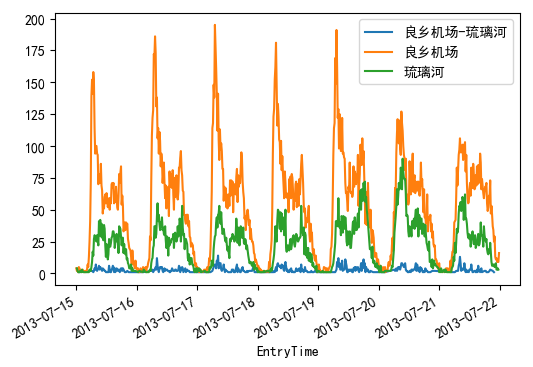

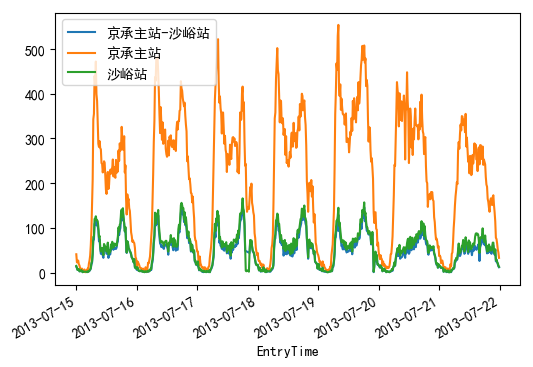

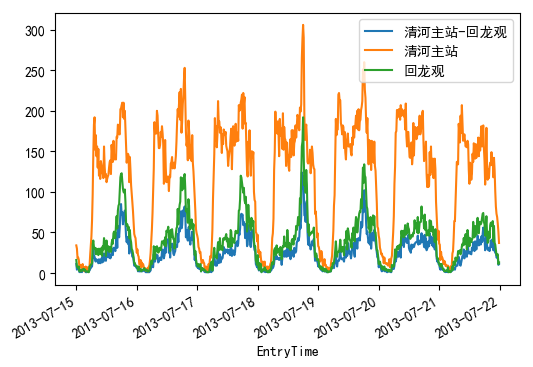

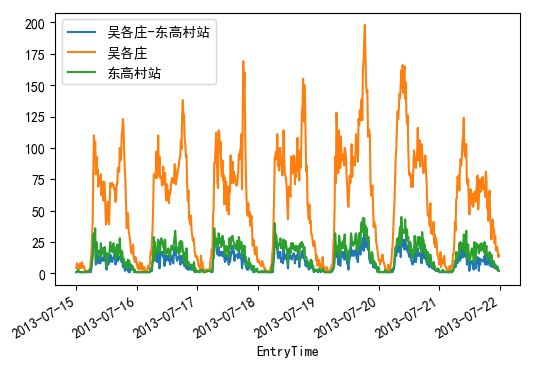

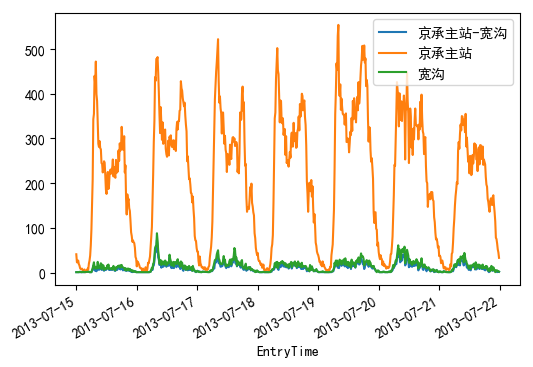

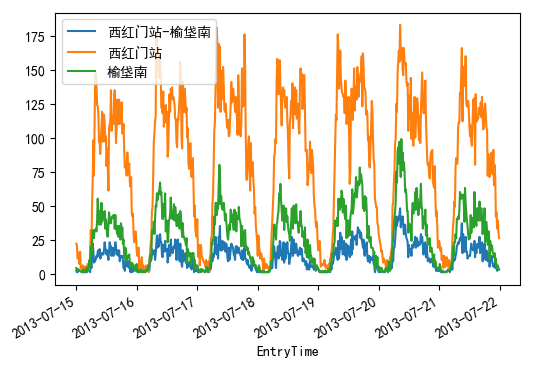

In [163]:
ods = [[51, 54], [68, 70], [511, 515], [877, 887], [68, 920], [56, 942]]
for o, d in ods:
    plt.figure()
    o_name = station.name.loc[o]
    d_name = station.name.loc[d]
    od_series = od[:, o, d]
    o_series = od[:, o].groupby('EntryTime').sum()
    d_series = od[:, :, d].groupby('EntryTime').sum()
    od_series.plot(label=o_name + '-' + d_name)
    o_series.plot(label=o_name)
    d_series.plot(label=d_name)
    plt.legend()
    plt.show()

### OD Dynamics

In [140]:
morning='2013-07-17 09:00:00'
noon = '2013-07-17 12:00:00'
evening='2013-07-17 18:00:00'

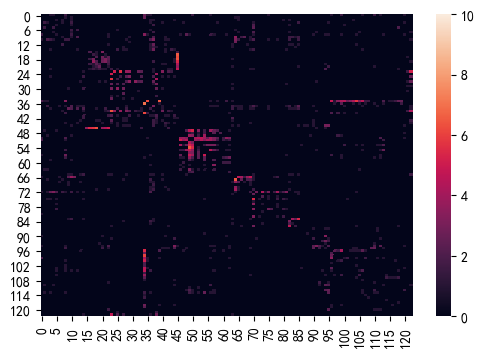

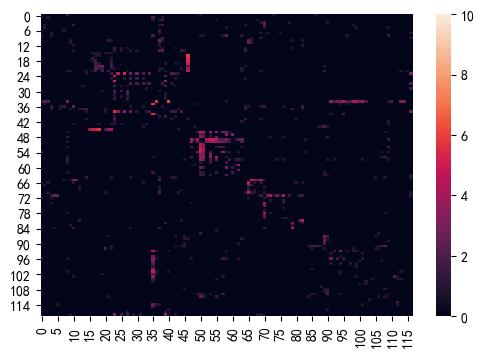

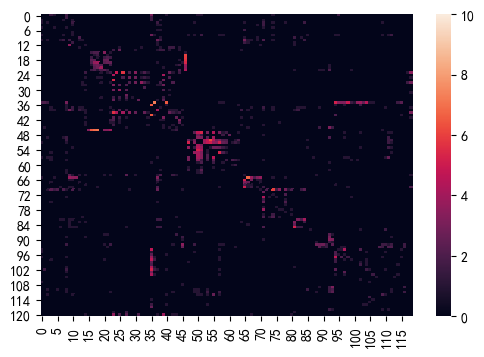

In [162]:
for time in [morning, noon, evening]:
    img = od.loc[time].unstack().fillna(0).values
    img = np.log2(img + 1)
    sns.heatmap(img, vmax=10)
    plt.show()